# 목표 : 고객의 이탈 여부를 파악
- 이탈 유, 무의 변수 : churn 변수

In [4]:
# load dataset
import pandas as pd

churn_train = pd.read_csv("./data/Churn_Dataset/train.csv")
churn_test = pd.read_csv("./data/Churn_Dataset/test.csv")

In [5]:
# train data size
churn_train.shape

(3333, 20)

In [6]:
# train value list
churn_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [7]:
# test data size
churn_test.shape

(1667, 20)

In [8]:
# test value list
churn_test.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

=> test와 train data size가 이미 1:3 정도 이므로 굳이 dataset을 나눌필요가 없어 보인다.

=> Train과 Test Dataset의 columns는 같으며, churn value를 예측해야함

=> 각각의 value들의 구성값은 다음과 같다.

In [9]:
churn_train['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [10]:
churn_train['account_length'].unique()

array([128, 107, 137,  84,  75, 118, 121, 147, 117, 141,  65,  74, 168,
        95,  62, 161,  85,  93,  76,  73,  77, 130, 111, 132, 174,  57,
        54,  20,  49, 142, 172,  12,  72,  36,  78, 136, 149,  98, 135,
        34, 160,  64,  59, 119,  97,  52,  60,  10,  96,  87,  81,  68,
       125, 116,  38,  40,  43, 113, 126, 150, 138, 162,  90,  50,  82,
       144,  46,  70,  55, 106,  94, 155,  80, 104,  99, 120, 108, 122,
       157, 103,  63, 112,  41, 193,  61,  92, 131, 163,  91, 127, 110,
       140,  83, 145,  56, 151, 139,   6, 115, 146, 185, 148,  32,  25,
       179,  67,  19, 170, 164,  51, 208,  53, 105,  66,  86,  35,  88,
       123,  45, 100, 215,  22,  33, 114,  24, 101, 143,  48,  71, 167,
        89, 199, 166, 158, 196, 209,  16,  39, 173, 129,  44,  79,  31,
       124,  37, 159, 194, 154,  21, 133, 224,  58,  11, 109, 102, 165,
        18,  30, 176,  47, 190, 152,  26,  69, 186, 171,  28, 153, 169,
        13,  27,   3,  42, 189, 156, 134, 243,  23,   1, 205, 20

In [11]:
churn_train['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [12]:
churn_train['international_plan'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
churn_train['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
churn_train['number_vmail_messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9], dtype=int64)

In [15]:
churn_train['total_day_minutes'].unique()

array([ 265.1,  161.6,  243.4, ...,  321.1,  231.1,  180.8])

In [16]:
churn_train['total_day_calls'].unique()

array([110, 123, 114,  71, 113,  98,  88,  79,  97,  84, 137, 127,  96,
        70,  67, 139,  66,  90, 117,  89, 112, 103,  86,  76, 115,  73,
       109,  95, 105, 121, 118,  94,  80, 128,  64, 106, 102,  85,  82,
        77, 120, 133, 135, 108,  57,  83, 129,  91,  92,  74,  93, 101,
       146,  72,  99, 104, 125,  61, 100,  87, 131,  65, 124, 119,  52,
        68, 107,  47, 116, 151, 126, 122, 111, 145,  78, 136, 140, 148,
        81,  55,  69, 158, 134, 130,  63,  53,  75, 141, 163,  59, 132,
       138,  54,  58,  62, 144, 143, 147,  36,  40, 150,  56,  51, 165,
        30,  48,  60,  42,   0,  45, 160, 149, 152, 142, 156,  35,  49,
       157,  44], dtype=int64)

In [17]:
churn_train['total_day_charge'].unique()

array([ 45.07,  27.47,  41.38, ...,  54.59,  39.29,  30.74])

In [18]:
churn_train['total_eve_minutes'].unique()

array([ 197.4,  195.5,  121.2, ...,  153.4,  288.8,  265.9])

In [19]:
churn_train['total_eve_calls'].unique()

array([ 99, 103, 110,  88, 122, 101, 108,  94,  80, 111,  83, 148,  71,
        75,  76,  97,  90,  65,  93, 121, 102,  72, 112, 100,  84, 109,
        63, 107, 115, 119, 116,  92,  85,  98, 118,  74, 117,  58,  96,
        66,  67,  62,  77, 164, 126, 142,  64, 104,  79,  95,  86, 105,
        81, 113, 106,  59,  48,  82,  87, 123, 114, 140, 128,  60,  78,
       125,  91,  46, 138, 129,  89, 133, 136,  57, 135, 139,  51,  70,
       151, 137, 134,  73, 152, 168,  68, 120,  69, 127, 132, 143,  61,
       124,  42,  54, 131,  52, 149,  56,  37, 130,  49, 146, 147,  55,
        12,  50, 157, 155,  45, 144,  36, 156,  53, 141,  44, 153, 154,
       150,  43,   0, 145, 159, 170], dtype=int64)

In [20]:
churn_train['total_eve_charge'].unique()

array([ 16.78,  16.62,  10.3 , ...,  13.04,  24.55,  22.6 ])

In [21]:
churn_train['total_night_minutes'].unique()

array([ 244.7,  254.4,  162.6, ...,  280.9,  120.1,  279.1])

In [22]:
churn_train['total_night_calls'].unique()

array([ 91, 103, 104,  89, 121, 118,  96,  90,  97, 111,  94, 128, 115,
        99,  75, 108,  74, 133,  64,  78, 105,  68, 102, 148,  98, 116,
        71, 109, 107, 135,  92,  86, 127,  79,  87, 129,  57,  77,  95,
        54, 106,  53,  67, 139,  60, 100,  61,  73, 113,  76, 119,  88,
        84,  62, 137,  72, 142, 114, 126, 122,  81, 123, 117,  82,  80,
       120, 130, 134,  59, 112, 132, 110, 101, 150,  69, 131,  83,  93,
       124, 136, 125,  66, 143,  58,  55,  85,  56,  70,  46,  42, 152,
        44, 145,  50, 153,  49, 175,  63, 138, 154, 140, 141, 146,  65,
        51, 151, 158, 155, 157, 147, 144, 149, 166,  52,  33, 156,  38,
        36,  48, 164], dtype=int64)

In [23]:
churn_train['total_night_charge'].unique()

array([ 11.01,  11.45,   7.32,   8.86,   8.41,   9.18,   9.57,   9.53,
         9.71,  14.69,   9.4 ,   8.82,   6.35,   8.65,   9.14,   7.23,
         4.02,   5.83,   7.46,   8.68,   9.43,   8.18,   8.53,  10.67,
        11.28,   8.22,   4.59,   8.17,   8.04,  11.27,  11.08,  13.2 ,
        12.61,   9.61,   6.88,   5.82,  10.25,   4.58,   8.47,   8.45,
         5.5 ,  14.02,   8.03,  11.94,   7.34,   6.06,  10.9 ,   6.44,
         3.18,  10.66,  11.21,  12.73,  10.28,  12.16,   6.34,   8.15,
         5.84,   8.52,   7.5 ,   7.48,   6.21,  11.95,   7.15,   9.63,
         7.1 ,   6.91,   6.69,  13.29,  11.46,   7.76,   6.86,   8.16,
        12.15,   7.79,   7.99,  10.29,  10.08,  12.53,   7.91,  10.02,
         8.61,  14.54,   8.21,   9.09,   4.93,  11.39,  11.88,   5.75,
         7.83,   8.59,   7.52,  12.38,   7.21,   5.81,   8.1 ,  11.04,
        11.19,   8.55,   8.42,   9.76,   9.87,  10.86,   5.36,  10.03,
        11.15,   9.51,   6.22,   2.59,   7.65,   6.45,   9.  ,   6.4 ,
      

In [24]:
churn_train['total_intl_minutes'].unique()

array([ 10. ,  13.7,  12.2,   6.6,  10.1,   6.3,   7.5,   7.1,   8.7,
        11.2,  12.7,   9.1,  12.3,  13.1,   5.4,  13.8,   8.1,  13. ,
        10.6,   5.7,   9.5,   7.7,  10.3,  15.5,  14.7,  11.1,  14.2,
        12.6,  11.8,   8.3,  14.5,  10.5,   9.4,  14.6,   9.2,   3.5,
         8.5,  13.2,   7.4,   8.8,  11. ,   7.8,   6.8,  11.4,   9.3,
         9.7,  10.2,   8. ,   5.8,  12.1,  12. ,  11.6,   8.2,   6.2,
         7.3,   6.1,  11.7,  15. ,   9.8,  12.4,   8.6,  10.9,  13.9,
         8.9,   7.9,   5.3,   4.4,  12.5,  11.3,   9. ,   9.6,  13.3,
        20. ,   7.2,   6.4,  14.1,  14.3,   6.9,  11.5,  15.8,  12.8,
        16.2,   0. ,  11.9,   9.9,   8.4,  10.8,  13.4,  10.7,  17.6,
         4.7,   2.7,  13.5,  12.9,  14.4,  10.4,   6.7,  15.4,   4.5,
         6.5,  15.6,   5.9,  18.9,   7.6,   5. ,   7. ,  14. ,  18. ,
        16. ,  14.8,   3.7,   2. ,   4.8,  15.3,   6. ,  13.6,  17.2,
        17.5,   5.6,  18.2,   3.6,  16.5,   4.6,   5.1,   4.1,  16.3,
        14.9,  16.4,

In [25]:
churn_train['total_intl_calls'].unique()

array([ 3,  5,  7,  6,  4,  2,  9, 19,  1, 10, 15,  8, 11,  0, 12, 13, 18,
       14, 16, 20, 17], dtype=int64)

In [26]:
churn_train['total_intl_charge'].unique()

array([ 2.7 ,  3.7 ,  3.29,  1.78,  2.73,  1.7 ,  2.03,  1.92,  2.35,
        3.02,  3.43,  2.46,  3.32,  3.54,  1.46,  3.73,  2.19,  3.51,
        2.86,  1.54,  2.57,  2.08,  2.78,  4.19,  3.97,  3.  ,  3.83,
        3.4 ,  3.19,  2.24,  3.92,  2.84,  2.54,  3.94,  2.48,  0.95,
        2.3 ,  3.56,  2.  ,  2.38,  2.97,  2.11,  1.84,  3.08,  2.51,
        2.62,  2.75,  2.16,  1.57,  3.27,  3.24,  3.13,  2.21,  1.67,
        1.97,  1.65,  3.16,  4.05,  2.65,  3.35,  2.32,  2.94,  3.75,
        2.4 ,  2.13,  1.43,  1.19,  3.38,  3.05,  2.43,  2.59,  3.59,
        5.4 ,  1.94,  1.73,  3.81,  3.86,  1.86,  3.11,  4.27,  3.46,
        4.37,  0.  ,  3.21,  2.67,  2.27,  2.92,  3.62,  2.89,  4.75,
        1.27,  0.73,  3.65,  3.48,  3.89,  2.81,  1.81,  4.16,  1.22,
        1.76,  4.21,  1.59,  5.1 ,  2.05,  1.35,  1.89,  3.78,  4.86,
        4.32,  4.  ,  1.  ,  0.54,  1.3 ,  4.13,  1.62,  3.67,  4.64,
        4.73,  1.51,  4.91,  0.97,  4.46,  1.24,  1.38,  1.11,  4.4 ,
        4.02,  4.43,

In [27]:
churn_train['number_customer_service_calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8], dtype=int64)

In [28]:
churn_train['churn'].unique()

array(['no', 'yes'], dtype=object)

# Naive Bayes

In [29]:
# create naive bayes model
from sklearn import naive_bayes

model_naive = naive_bayes.MultinomialNB()

=> Dataset중 일부가 object라서 오류가 났기 때문에 object를 mapping하여 number로 변환

In [59]:
# change object to number
import numpy as np

class_mapping1 = {label:idx for idx, label in enumerate(np.unique(churn_train['state']))}
churn_train['state'] = churn_train['state'].map(class_mapping1)

class_mapping2 = {label:idx for idx, label in enumerate(np.unique(churn_train['area_code']))}
churn_train['area_code'] = churn_train['area_code'].map(class_mapping2)

class_mapping3 = {label:idx for idx, label in enumerate(np.unique(churn_train['international_plan']))}
churn_train['international_plan'] = churn_train['international_plan'].map(class_mapping3)

class_mapping4 = {label:idx for idx, label in enumerate(np.unique(churn_train['voice_mail_plan']))}
churn_train['voice_mail_plan'] = churn_train['voice_mail_plan'].map(class_mapping4)

class_mapping5 = {label:idx for idx, label in enumerate(np.unique(churn_train['churn']))}
churn_train['churn'] = churn_train['churn'].map(class_mapping5)

In [60]:
X_train = churn_train.drop('churn', axis=1)
Y_train = churn_train['churn']

In [61]:
# train
model_naive.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
# model train result
model_naive.score(X_train, Y_train)

0.63726372637263728

=> 학습률이 63%

In [68]:
# predict
class_mapping1 = {label:idx for idx, label in enumerate(np.unique(churn_test['state']))}
churn_test['state'] = churn_test['state'].map(class_mapping1)

class_mapping2 = {label:idx for idx, label in enumerate(np.unique(churn_test['area_code']))}
churn_test['area_code'] = churn_test['area_code'].map(class_mapping2)

class_mapping3 = {label:idx for idx, label in enumerate(np.unique(churn_test['international_plan']))}
churn_test['international_plan'] = churn_test['international_plan'].map(class_mapping3)

class_mapping4 = {label:idx for idx, label in enumerate(np.unique(churn_test['voice_mail_plan']))}
churn_test['voice_mail_plan'] = churn_test['voice_mail_plan'].map(class_mapping4)

class_mapping5 = {label:idx for idx, label in enumerate(np.unique(churn_test['churn']))}
churn_test['churn'] = churn_test['churn'].map(class_mapping5)

X_test = churn_test.drop('churn', axis=1)

In [105]:
submission = pd.DataFrame({'churn1':model_naive.predict(X_test), 'churn2':Y_test})
submission = submission[['churn1', 'churn2']]
submission.to_csv('sub.csv',index=False)

churn = pd.read_csv("./data/Churn_Dataset/sub.csv")
t=0
s=0
for i in range(len(churn)):
    t=t+1
    if(churn['churn2'][i] == churn['churn1'][i]):
        s=s+1
print(s/t * 100, "%")

61.307738452309536 %


=> 61%의 정확성을 갖는다

# 요소별 개별 학습

In [3]:
from sklearn import naive_bayes
import numpy as np
import pandas as pd

churn_train = pd.read_csv("./data/Churn_Dataset/train.csv")
churn_test = pd.read_csv("./data/Churn_Dataset/test.csv")

model_naive = naive_bayes.MultinomialNB()

class_mapping1 = {label:idx for idx, label in enumerate(np.unique(churn_train['state']))}
churn_train['state'] = churn_train['state'].map(class_mapping1)
class_mapping2 = {label:idx for idx, label in enumerate(np.unique(churn_train['area_code']))}
churn_train['area_code'] = churn_train['area_code'].map(class_mapping2)
class_mapping3 = {label:idx for idx, label in enumerate(np.unique(churn_train['international_plan']))}
churn_train['international_plan'] = churn_train['international_plan'].map(class_mapping3)
class_mapping4 = {label:idx for idx, label in enumerate(np.unique(churn_train['voice_mail_plan']))}
churn_train['voice_mail_plan'] = churn_train['voice_mail_plan'].map(class_mapping4)
class_mapping5 = {label:idx for idx, label in enumerate(np.unique(churn_train['churn']))}
churn_train['churn'] = churn_train['churn'].map(class_mapping5)

X_train = churn_train.drop(['churn', 'state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge'], axis=1)
Y_train = churn_train['churn']

model_naive.fit(X_train, Y_train)
model_naive.score(X_train, Y_train)

class_mapping1 = {label:idx for idx, label in enumerate(np.unique(churn_test['state']))}
churn_test['state'] = churn_test['state'].map(class_mapping1)
class_mapping2 = {label:idx for idx, label in enumerate(np.unique(churn_test['area_code']))}
churn_test['area_code'] = churn_test['area_code'].map(class_mapping2)
class_mapping3 = {label:idx for idx, label in enumerate(np.unique(churn_test['international_plan']))}
churn_test['international_plan'] = churn_test['international_plan'].map(class_mapping3)
class_mapping4 = {label:idx for idx, label in enumerate(np.unique(churn_test['voice_mail_plan']))}
churn_test['voice_mail_plan'] = churn_test['voice_mail_plan'].map(class_mapping4)
class_mapping5 = {label:idx for idx, label in enumerate(np.unique(churn_test['churn']))}
churn_test['churn'] = churn_test['churn'].map(class_mapping5)

X_test = churn_test.drop(['churn', 'state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge'], axis=1)
Y_test = churn_test['churn']

submission = pd.DataFrame({'churn1':model_naive.predict(X_test), 'churn2':Y_test})
submission = submission[['churn1', 'churn2']]
submission.to_csv('./data/Churn_Dataset/sub.csv',index=False)

churn = pd.read_csv("./data/Churn_Dataset/sub.csv")
t=0
s=0
for i in range(len(churn)):
    t=t+1
    if(churn['churn2'][i] == churn['churn1'][i]):
        s=s+1
print(s/t * 100, "%")

86.5626874625075 %


<p>=> 'number_customer_service_calls'만 학습한 결과 학습률은 86%</p>
<p>=> 정확도가 상승하였음</p>

In [4]:
from sklearn import naive_bayes
import numpy as np
import pandas as pd

churn_train = pd.read_csv("./data/Churn_Dataset/train.csv")
churn_test = pd.read_csv("./data/Churn_Dataset/test.csv")

model_naive = naive_bayes.MultinomialNB()

class_mapping1 = {label:idx for idx, label in enumerate(np.unique(churn_train['state']))}
churn_train['state'] = churn_train['state'].map(class_mapping1)
class_mapping2 = {label:idx for idx, label in enumerate(np.unique(churn_train['area_code']))}
churn_train['area_code'] = churn_train['area_code'].map(class_mapping2)
class_mapping3 = {label:idx for idx, label in enumerate(np.unique(churn_train['international_plan']))}
churn_train['international_plan'] = churn_train['international_plan'].map(class_mapping3)
class_mapping4 = {label:idx for idx, label in enumerate(np.unique(churn_train['voice_mail_plan']))}
churn_train['voice_mail_plan'] = churn_train['voice_mail_plan'].map(class_mapping4)
class_mapping5 = {label:idx for idx, label in enumerate(np.unique(churn_train['churn']))}
churn_train['churn'] = churn_train['churn'].map(class_mapping5)

X_train = churn_train.drop(['churn', 'state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls'], axis=1)
Y_train = churn_train['churn']

model_naive.fit(X_train, Y_train)
model_naive.score(X_train, Y_train)

class_mapping1 = {label:idx for idx, label in enumerate(np.unique(churn_test['state']))}
churn_test['state'] = churn_test['state'].map(class_mapping1)
class_mapping2 = {label:idx for idx, label in enumerate(np.unique(churn_test['area_code']))}
churn_test['area_code'] = churn_test['area_code'].map(class_mapping2)
class_mapping3 = {label:idx for idx, label in enumerate(np.unique(churn_test['international_plan']))}
churn_test['international_plan'] = churn_test['international_plan'].map(class_mapping3)
class_mapping4 = {label:idx for idx, label in enumerate(np.unique(churn_test['voice_mail_plan']))}
churn_test['voice_mail_plan'] = churn_test['voice_mail_plan'].map(class_mapping4)
class_mapping5 = {label:idx for idx, label in enumerate(np.unique(churn_test['churn']))}
churn_test['churn'] = churn_test['churn'].map(class_mapping5)

X_test = churn_test.drop(['churn', 'state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls'], axis=1)
Y_test = churn_test['churn']

submission = pd.DataFrame({'churn1':model_naive.predict(X_test), 'churn2':Y_test})
submission = submission[['churn1', 'churn2']]
submission.to_csv('./data/Churn_Dataset/sub.csv',index=False)

churn = pd.read_csv("./data/Churn_Dataset/sub.csv")
t=0
s=0
for i in range(len(churn)):
    t=t+1
    if(churn['churn2'][i] == churn['churn1'][i]):
        s=s+1
print(s/t * 100, "%")

86.5626874625075 %


In [5]:
from sklearn import naive_bayes
import numpy as np
import pandas as pd

churn_train = pd.read_csv("./data/Churn_Dataset/train.csv")
churn_test = pd.read_csv("./data/Churn_Dataset/test.csv")

model_naive = naive_bayes.MultinomialNB()

class_mapping1 = {label:idx for idx, label in enumerate(np.unique(churn_train['state']))}
churn_train['state'] = churn_train['state'].map(class_mapping1)
class_mapping2 = {label:idx for idx, label in enumerate(np.unique(churn_train['area_code']))}
churn_train['area_code'] = churn_train['area_code'].map(class_mapping2)
class_mapping3 = {label:idx for idx, label in enumerate(np.unique(churn_train['international_plan']))}
churn_train['international_plan'] = churn_train['international_plan'].map(class_mapping3)
class_mapping4 = {label:idx for idx, label in enumerate(np.unique(churn_train['voice_mail_plan']))}
churn_train['voice_mail_plan'] = churn_train['voice_mail_plan'].map(class_mapping4)
class_mapping5 = {label:idx for idx, label in enumerate(np.unique(churn_train['churn']))}
churn_train['churn'] = churn_train['churn'].map(class_mapping5)

X_train = churn_train.drop(['churn', 'state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'number_customer_service_calls', 'total_intl_charge'], axis=1)
Y_train = churn_train['churn']

model_naive.fit(X_train, Y_train)
model_naive.score(X_train, Y_train)

0.85508550855085508

=> 학습률이 85%

In [6]:
from sklearn import naive_bayes
import numpy as np
import pandas as pd

churn_train = pd.read_csv("./data/Churn_Dataset/train.csv")
churn_test = pd.read_csv("./data/Churn_Dataset/test.csv")

model_naive = naive_bayes.MultinomialNB()

class_mapping1 = {label:idx for idx, label in enumerate(np.unique(churn_train['state']))}
churn_train['state'] = churn_train['state'].map(class_mapping1)
class_mapping2 = {label:idx for idx, label in enumerate(np.unique(churn_train['area_code']))}
churn_train['area_code'] = churn_train['area_code'].map(class_mapping2)
class_mapping3 = {label:idx for idx, label in enumerate(np.unique(churn_train['international_plan']))}
churn_train['international_plan'] = churn_train['international_plan'].map(class_mapping3)
class_mapping4 = {label:idx for idx, label in enumerate(np.unique(churn_train['voice_mail_plan']))}
churn_train['voice_mail_plan'] = churn_train['voice_mail_plan'].map(class_mapping4)
class_mapping5 = {label:idx for idx, label in enumerate(np.unique(churn_train['churn']))}
churn_train['churn'] = churn_train['churn'].map(class_mapping5)

X_train = churn_train.drop(['churn', 'state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'number_customer_service_calls', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge'], axis=1)
Y_train = churn_train['churn']

model_naive.fit(X_train, Y_train)
model_naive.score(X_train, Y_train)

0.85508550855085508

In [7]:
from sklearn import naive_bayes
import numpy as np
import pandas as pd

churn_train = pd.read_csv("./data/Churn_Dataset/train.csv")
churn_test = pd.read_csv("./data/Churn_Dataset/test.csv")

model_naive = naive_bayes.MultinomialNB()

class_mapping1 = {label:idx for idx, label in enumerate(np.unique(churn_train['state']))}
churn_train['state'] = churn_train['state'].map(class_mapping1)
class_mapping2 = {label:idx for idx, label in enumerate(np.unique(churn_train['area_code']))}
churn_train['area_code'] = churn_train['area_code'].map(class_mapping2)
class_mapping3 = {label:idx for idx, label in enumerate(np.unique(churn_train['international_plan']))}
churn_train['international_plan'] = churn_train['international_plan'].map(class_mapping3)
class_mapping4 = {label:idx for idx, label in enumerate(np.unique(churn_train['voice_mail_plan']))}
churn_train['voice_mail_plan'] = churn_train['voice_mail_plan'].map(class_mapping4)
class_mapping5 = {label:idx for idx, label in enumerate(np.unique(churn_train['churn']))}
churn_train['churn'] = churn_train['churn'].map(class_mapping5)

X_train = churn_train.drop(['churn', 'state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'number_customer_service_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge'], axis=1)
Y_train = churn_train['churn']

model_naive.fit(X_train, Y_train)
model_naive.score(X_train, Y_train)

0.85508550855085508

# Decision Tree Model

In [3]:
import pandas as pd
from IPython.display import display

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# data preprocessing
from operator import eq
import numpy as np

# Yes = 1 , No = 0 
for i in range(0, len(train["international_plan"])):
    if eq(train["international_plan"][i], "yes"):
        train["international_plan"][i] = 1
    elif eq(train["international_plan"][i], "no"):
        train["international_plan"][i] = 0
train["international_plan"] = train["international_plan"].astype(np.float32)

for i in range(0, len(test["international_plan"])):
    if eq(test["international_plan"][i], "yes"):
        test["international_plan"][i] = 1
    elif eq(test["international_plan"][i], "no"):
        test["international_plan"][i] = 0
test["international_plan"] =test["international_plan"].astype(np.float32)

for i in range(0, len(train["voice_mail_plan"])):
    if eq(train["voice_mail_plan"][i], "yes"):
        train["voice_mail_plan"][i] = 1
    elif eq(train["voice_mail_plan"][i], "no"):
        train["voice_mail_plan"][i] = 0
train["voice_mail_plan"] = train["voice_mail_plan"].astype(np.float32)

for i in range(0, len(test["voice_mail_plan"])):
    if eq(test["voice_mail_plan"][i], "yes"):
        test["voice_mail_plan"][i] = 1
    elif eq(test["voice_mail_plan"][i], "no"):
        test["voice_mail_plan"][i] = 0
test["voice_mail_plan"] = test["voice_mail_plan"].astype(np.float32)

for i in range(0, len(train["churn"])):
    if eq(train["churn"][i], "yes"):
        train["churn"][i] = 1
    elif eq(train["churn"][i], "no"):
        train["churn"][i] = 0
train["churn"] = train["churn"].astype(np.float32)

for i in range(0, len(test["churn"])):
    if eq(test["churn"][i], "yes"):
        test["churn"][i] = 1
    elif eq(test["churn"][i], "no"):
        test["churn"][i] = 0
test["churn"] = test["churn"].astype(np.float32)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [4]:
# 사용자에 대한 기초적 정보 -> Remove
train = train.drop(["state", "area_code"], axis=1)
test = test.drop(["state", "area_code"], axis=1)

train_features = train.drop(["churn"], axis=1).columns
test_features = test.drop(["churn"], axis=1).columns

In [5]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(train[train_features], train["churn"])

predictions = dtc.predict(test[test_features])
dtc.score(test[test_features], test["churn"])

0.93281343731253752

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test["churn"], predictions))

             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96      1443
        1.0       0.79      0.69      0.73       224

avg / total       0.93      0.93      0.93      1667



In [7]:
print(confusion_matrix(test["churn"], predictions))

[[1401   42]
 [  70  154]]


=> 대부분의 정답 데이터는 no 에 해당하는 데이터

#### 변수의 중요도를 확인

In [8]:
train_feature_importance = pd.concat([pd.DataFrame(train[train_features].columns), pd.DataFrame(dtc.feature_importances_)], axis=1)
train_feature_importance.columns = ["feature", "importance"]
display(train_feature_importance)

,feature,importance
0,account_length,0.025475
1,international_plan,0.090145
2,voice_mail_plan,0.014797
3,number_vmail_messages,0.033523
4,total_day_minutes,0.034422
5,total_day_calls,0.017248
6,total_day_charge,0.222838
7,total_eve_minutes,0.080814
8,total_eve_calls,0.031114
9,total_eve_charge,0.067007


In [9]:
max = train_feature_importance["importance"].max()
for i in range(0, len(train_feature_importance["importance"])):
    if train_feature_importance["importance"][i] == max:
        display(train_feature_importance.loc[i])
        break 

feature       total_day_charge
importance            0.222838
Name: 6, dtype: object

In [10]:
min = train_feature_importance["importance"].min()
for i in range(0, len(train_feature_importance["importance"])):
    if train_feature_importance["importance"][i] == min:
        display(train_feature_importance.loc[i])
        break 

feature       voice_mail_plan
importance          0.0147973
Name: 2, dtype: object

In [11]:
train_feature_importance.sort_values(by=["importance"], axis=0, inplace=True, ascending=False)
display(train_feature_importance)

,feature,importance
6,total_day_charge,0.222838
16,number_customer_service_calls,0.100435
1,international_plan,0.090145
15,total_intl_charge,0.084273
7,total_eve_minutes,0.080814
9,total_eve_charge,0.067007
14,total_intl_calls,0.053367
10,total_night_minutes,0.049527
11,total_night_calls,0.045648
4,total_day_minutes,0.034422


=> 낮 시간의 통화시간 및 그에 대한 분당 요금, 서비스응대 순으로 분류에 영향을 미쳤으며, 반대로 저녁 및 밤 시간의 통화 시간 및 분당 요금 순으로 기여하지 못함

# K-fold Validation

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
cv = KFold(n_splits=10)

dtc = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
scores = []
for train_index, test_index in cv.split(train):
    X_train, X_test = train.loc[train_index][train_features], train.loc[test_index][train_features]
    Y_train, Y_test = train.loc[train_index]["churn"], train.loc[test_index]["churn"]
    
    dtc.fit(X_train, Y_train)   
    scores.append(dtc.score(X_test,Y_test))    

In [13]:
display(scores)

[0.91317365269461082,
 0.92814371257485029,
 0.93113772455089816,
 0.93993993993993996,
 0.93393393393393398,
 0.92192192192192191,
 0.92792792792792789,
 0.93993993993993996,
 0.90090090090090091,
 0.94894894894894899]

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

pred = dtc.predict(test[test_features])
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(test["churn"], pred), 
    columns=["Predicted No", "Predicted Yes"], 
    index=["Actual No", "Actual Yes"]
)
display(confusion_matrix)

,Predicted No,Predicted Yes
Actual No,1382,61
Actual Yes,70,154


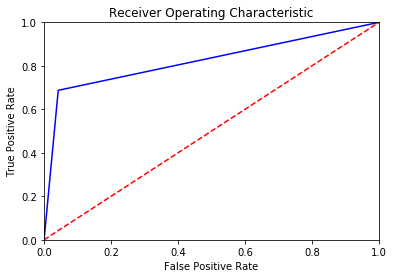

In [15]:
probs = dtc.predict_proba(test[test_features])
fpr, tpr, threshold = roc_curve(test["churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
score = dtc.score(test[test_features], test["churn"])
print("Accuracy: ", score)

Accuracy:  0.921415716857


In [17]:
# 중요도
test_feature_importance = pd.concat([pd.DataFrame(test[test_features].columns), pd.DataFrame(dtc.feature_importances_)], axis=1)
test_feature_importance.columns = ["feature", "importance"]
test_feature_importance.sort_values(by=["importance"], axis=0, inplace=True, ascending=False)
display(test_feature_importance)

,feature,importance
6,total_day_charge,0.182263
7,total_eve_minutes,0.110116
16,number_customer_service_calls,0.109132
1,international_plan,0.092140
15,total_intl_charge,0.088862
10,total_night_minutes,0.062090
14,total_intl_calls,0.061604
4,total_day_minutes,0.059277
9,total_eve_charge,0.044590
2,voice_mail_plan,0.039162


=> dataset 자체에 No 에 해당하는 값이 많아 정확도와 특이도의 수치가 높음

- 개선해야되는 서비스
  - number_vmail_messages	
  - total_day_calls
  - total_eve_calls
  - 등등...